In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from math import sqrt
import itertools
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.svm import SVC

№1.3

In [51]:
housing = pd.read_csv('housing.csv')
housing['blank'] = housing['total_bedrooms'].apply(lambda total_bedrooms: 0 if math.isnan(total_bedrooms) else 1)

DUMMY_SEP = '__'
housing = pd.get_dummies(housing, prefix_sep=DUMMY_SEP)

In [52]:
housing['average_rooms'] = housing['total_rooms']/housing['households']
housing['average_bedrooms'] = housing['total_bedrooms']/housing['households']

housing = housing.drop('total_rooms', axis=1)
housing = housing.drop('total_bedrooms', axis=1)

In [53]:
housing_blank = housing.loc[housing['blank'] == 0]
housing_blank = housing_blank.drop('blank', axis=1)

housing =  housing.loc[housing['blank'] == 1]
housing = housing.drop('blank', axis=1)

Заполнение пропусков:

In [54]:
housing_without_value = housing.drop('median_house_value', axis=1)
X_housing_without_value = housing_without_value.drop('average_bedrooms', axis=1)
y_housing_without_value = housing_without_value['average_bedrooms']

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_housing_without_value, y_housing_without_value) 


housing_blank_without_value = housing_blank.drop('median_house_value', axis=1)

X_blank = housing_blank_without_value.drop('average_bedrooms',axis=1)

predictions = linear_regression_model.predict(X_blank)
housing_blank['average_bedrooms'] = predictions

housing = pd.concat([housing, housing_blank], ignore_index=True)
pass

In [55]:
housing_train_val, housing_test = train_test_split(housing, test_size=0.5)

housing_train, housing_val = train_test_split(housing_train_val, test_size=0.5)

def normalize(arr):
    arr['longitude'] -= np.mean(housing_train['longitude'])
    arr['longitude'] /= np.std(housing_train['longitude'])
    arr['latitude'] -= np.mean(housing_train['latitude'])
    arr['latitude'] /= np.std(housing_train['latitude'])

housing = housing.copy()
normalize(housing)
    
housing_test = housing_test.copy()
normalize(housing_test)
    
housing_val = housing_val.copy()
normalize(housing_val)

housing_train = housing_train.copy()
normalize(housing_train)

№2.4

RMSE: 69064.89607395548


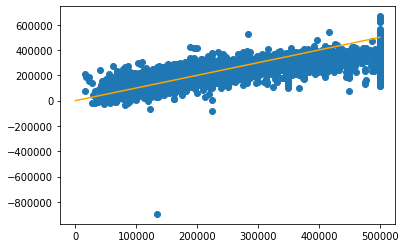

In [56]:
X_housing_train, y_housing_train = housing_train.drop("median_house_value",axis=1), housing_train['median_house_value']

linear_regression_model1 = LinearRegression() 
linear_regression_model1.fit(X_housing_train, y_housing_train) 

X_housing_val, y_housing_val = housing_val.drop("median_house_value",axis=1), housing_val['median_house_value']

predictions1 = linear_regression_model1.predict(X_housing_val)
mse = mean_squared_error(y_housing_val, predictions1) 
print("RMSE: {}".format(np.sqrt(mse)))

fig, ax = plt.subplots()
ax.scatter(y_housing_val, linear_regression_model1.predict(X_housing_val))
ax.plot(np.linspace(0,500000,2), np.linspace(0,500000,2), color='orange')
pass

RMSE: 66276.6376795799


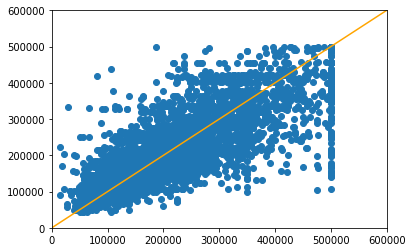

In [57]:
regressor = DecisionTreeRegressor(max_depth = 25, min_samples_split = 33) 
regressor.fit(X_housing_train, y_housing_train) 

predictions_regr = regressor.predict(X_housing_val)
mse2 = mean_squared_error(y_housing_val, predictions_regr) 
print("RMSE: {}".format(np.sqrt(mse2)))

fig, ax = plt.subplots()
ax.set_ylim(0, 600000)
ax.set_xlim(0, 600000)
ax.scatter(y_housing_val, regressor.predict(X_housing_val))
ax.plot(np.linspace(0,1000000,100), np.linspace(0,1000000,100), color='orange')
pass

In [58]:
print('До кластеризации\n\n', X_housing_train)
model = KMeans(n_clusters=4)
model.fit(X_housing_train[['longitude', 'latitude']])

X_housing_train['cluster'] = model.labels_
X_housing_train = X_housing_train.drop(['latitude', 'longitude'],axis=1)
X_housing_train = pd.get_dummies(X_housing_train, columns=['cluster'])


X_housing_val['cluster'] = model.predict(X_housing_val[['longitude', 'latitude']])
X_housing_val = X_housing_val.drop(['latitude', 'longitude'],axis=1)
print(X_housing_val['cluster'].value_counts())
X_housing_val = pd.get_dummies(X_housing_val, columns=['cluster'])

До кластеризации

        longitude  latitude  housing_median_age  population  households  \
10350   0.959615 -0.996531                 3.0       781.0       337.0   
19351  -0.694914  0.942324                43.0       176.0        60.0   
17367  -1.171218  0.806510                43.0      1013.0       428.0   
5459    0.583586 -0.771737                38.0       374.0       180.0   
4218    0.603641 -0.710855                18.0      2103.0      1116.0   
...          ...       ...                 ...         ...         ...   
4132    0.673833 -0.710855                40.0       795.0       330.0   
9190   -1.517165  1.162436                22.0      5600.0      2200.0   
4626    0.603641 -0.720221                52.0       714.0       293.0   
6886    0.754053 -0.762370                42.0      1085.0       438.0   
15439   1.445947 -1.240059                16.0       120.0        43.0   

       median_income  ocean_proximity__<1H OCEAN  ocean_proximity__INLAND  \
10350         5

       housing_median_age  population  households  median_income  \
10350                 3.0       781.0       337.0         5.6197   
19351                43.0       176.0        60.0         1.4250   
17367                43.0      1013.0       428.0         1.6708   
5459                 38.0       374.0       180.0         6.2673   
4218                 18.0      2103.0      1116.0         2.3250   
...                   ...         ...         ...            ...   
4132                 40.0       795.0       330.0         5.2723   
9190                 22.0      5600.0      2200.0         4.6463   
4626                 52.0       714.0       293.0         4.6838   
6886                 42.0      1085.0       438.0         5.1930   
15439                16.0       120.0        43.0         5.3590   

       ocean_proximity__<1H OCEAN  ocean_proximity__INLAND  \
10350                           1                        0   
19351                           0                        1 

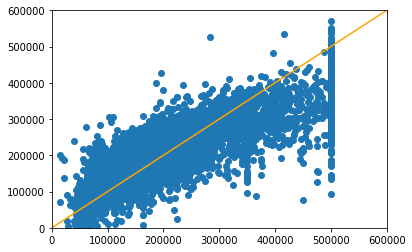

In [59]:

print(X_housing_train)
regressor = LinearRegression() 
regressor.fit(X_housing_train, y_housing_train) 

predictions_regr = regressor.predict(X_housing_val)
mse2 = mean_squared_error(y_housing_val, predictions_regr) 
print("RMSE: {}".format(np.sqrt(mse2)))

fig, ax = plt.subplots()
ax.set_ylim(0, 600000)
ax.set_xlim(0, 600000)
ax.scatter(y_housing_val, regressor.predict(X_housing_val))
ax.plot(np.linspace(0,1000000,2), np.linspace(0,1000000,2), color='orange')
pass

№2.1

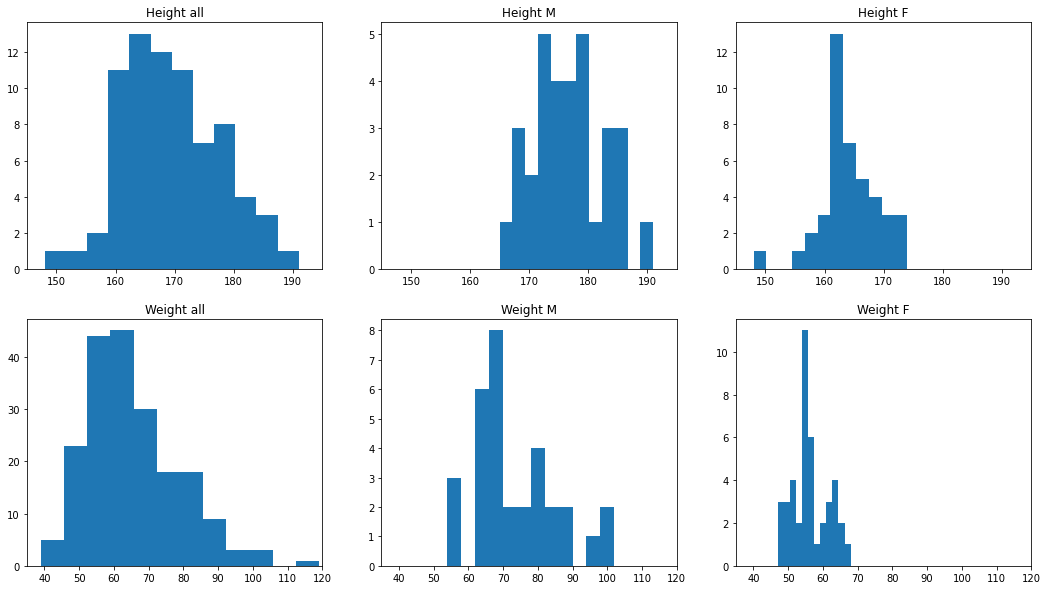

In [60]:
davis = pd.read_csv('Davis.csv')
davis = davis.loc[davis['height'] > 140]

davis_train_val, davis_test = train_test_split(davis, test_size=50)
davis_train, davis_val = train_test_split(davis_train_val, test_size=0.5)

davis_m = davis_train.loc[davis['sex'] == 'M']
davis_f = davis_train.loc[davis['sex'] == 'F']

fig, ax = plt.subplots(2, 3, figsize=(18,10))
ax[0][0].set_xlim(145, 195)
ax[0][0].hist(davis_train['height'], bins = 12)
ax[0][0].set_title('Height all')

ax[0][1].set_xlim(145, 195)
ax[0][1].hist(davis_m['height'], bins = 12)
ax[0][1].set_title('Height M')

ax[0][2].set_xlim(145, 195)
ax[0][2].hist(davis_f['height'], bins = 12)
ax[0][2].set_title('Height F')


ax[1][0].set_xlim(35, 120)
ax[1][0].hist(davis['weight'], bins = 12)
ax[1][0].set_title('Weight all')

ax[1][1].set_xlim(35, 120)
ax[1][1].hist(davis_m['weight'], bins = 12)
ax[1][1].set_title('Weight M')

ax[1][2].set_xlim(35, 120)
ax[1][2].hist(davis_f['weight'], bins = 12)
ax[1][2].set_title('Weight F')
pass

In [61]:
X_train, y_train = davis_train[['height', 'weight']], davis_train['sex']
X_val, y_val = davis_val[['height', 'weight']], davis_val['sex']

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_train)
print('Accuracy test: {:.2f}'.format(accuracy_score(predictions, y_train)))

predictions = logreg.predict(X_val)
print('Accuracy val: {:.2f}'.format(accuracy_score(predictions, y_val)))

Accuracy test: 0.88
Accuracy val: 0.89


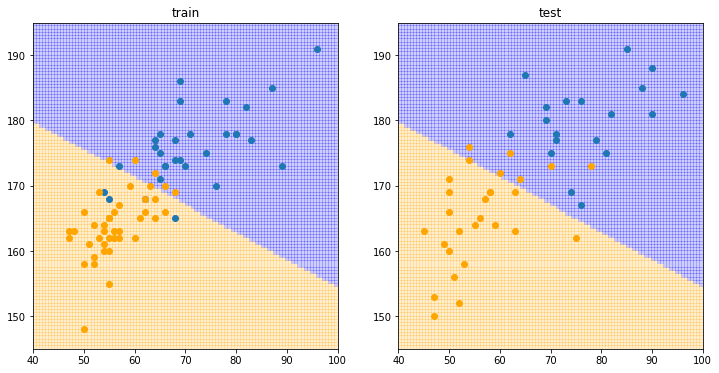

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

centres_prediction = logreg.predict(list(itertools.product(np.linspace(150,190,100), np.linspace(45,95,100))))

def convert_sex(value):
       value = value.replace('F','1').replace('M', '0')
       return int(value)

centres_prediction = np.vectorize(convert_sex)(np.array(centres_prediction)).reshape(100,100)


x = np.linspace(40,100,101)
y = np.linspace(145,195,101)

cmap = ListedColormap(['blue', 'orange'])
ax[0].pcolormesh(x, y, centres_prediction, alpha=0.2, cmap=cmap)
ax[1].pcolormesh(x, y, centres_prediction, alpha=0.2, cmap=cmap)

#ax[0].plot(X_train, y_train)

ax[0].scatter(davis_m['weight'], davis_m['height'])
ax[0].scatter(davis_f['weight'], davis_f['height'], color='orange')
ax[0].set_ylim(145, 195)
ax[0].set_xlim(40, 100)
ax[0].set_title('train')

davis_test_m = davis_test.loc[davis['sex'] == 'M']
davis_test_f = davis_test.loc[davis['sex'] == 'F']

ax[1].scatter(davis_test_m['weight'], davis_test_m['height'])
ax[1].scatter(davis_test_f['weight'], davis_test_f['height'], color='orange')
ax[1].set_ylim(145, 195)
ax[1].set_xlim(40, 100)
ax[1].set_title('test')

pass